In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customers = pd.read_json("/Users/inigojoaquin/Downloads/dim_customer.json")
invoices = pd.read_csv("/Users/inigojoaquin/Downloads/fct_invoice.csv")

1. How many unique customers are in the dataset?

In [106]:
customers["id"].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [94]:
print(invoices["category"].unique())
print(invoices["category"].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


3. Which payment method is the most popular? How many times was it used?

In [95]:
most_popular = invoices["payment_method"].value_counts()
frequency = most_popular.iloc[0]
print(str(most_popular.idxmax()) + " " + str(frequency) + " times")


Cash 44447 times


1. What are the three most popular categories, by total sales?

In [96]:
invoices["sales"] = invoices["quantity"] * invoices["price"]
popular_categories = invoices.groupby("category")["sales"].sum()
popular_categories.nlargest(3)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

2. What are the total sales attributed to customers over the age of 45?

In [97]:
combined = pd.merge(invoices, customers, left_on="customer_id", right_on="id")

combined["sales"] = combined["quantity"] * combined["price"]

above_45 = combined[(combined["age"] > 45) & (combined["age"].notnull())]

total_sales = above_45["sales"].sum()
print(total_sales)

82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

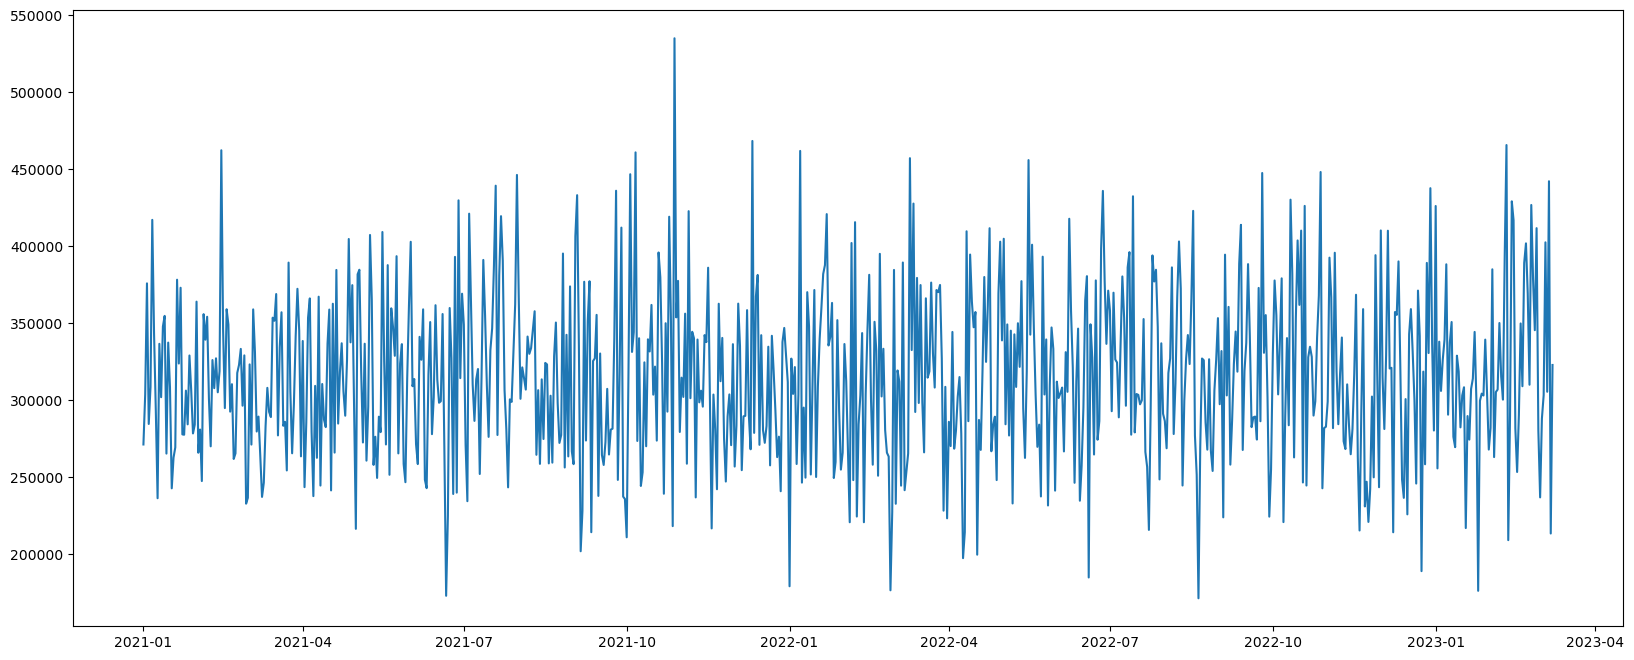

In [102]:


invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], dayfirst=True)

grouped = invoices.groupby("invoice_date", as_index=False)["sales"].sum()
grouped = grouped.sort_values(by="invoice_date", ascending=True)


x = grouped["invoice_date"]
y = grouped["sales"]

plt.figure(figsize=(20, 8))
plt.plot(x,y)



1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [99]:
merged = pd.merge(invoices, customers, left_on="customer_id", right_on="id")

merged["sales"] = merged["quantity"] * merged["price"]

merged["age_group"] = (merged["age"] // 10 * 10)


pivot_table = pd.pivot_table(merged, values="sales", index="age_group", columns="category", aggfunc="sum")


pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_group,,,,,,,,
10.0,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20.0,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30.0,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40.0,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50.0,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60.0,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70.0,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80.0,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
